In [1]:
import backtest.src.backtest as bkt
from backtest.config.index_performance_config import Config as Conf
import pandas as pd
import numpy as np
import dbtools.src.get_repository as rep
import dbtools.src.get_market_data as mkt
import matplotlib.pyplot as plt

cols_perf = Conf.cols_perf
cols_ffama = Conf.cols_ffama
s_pr_tr_id = Conf.s_pr_tr_id
s_index_id_name = Conf.s_index_id_name


# Kepler Cheuvreux Beta Profiles performance

In [2]:
# input
index_id = [95, 96, 97, 98, 99, 100, 101, 146]
end_date = '20231130'
start_date = '20180615'

In [3]:
# mapping gross return for index_id
idx_pr_id = pd.Index(index_id)
idx_gr_id = s_pr_tr_id.loc[s_pr_tr_id.index.intersection(index_id, sort = None)]
idx_id = idx_gr_id.index.union(idx_gr_id.values)

In [4]:
# load French-fama factor
df_ffama = bkt.get_ffama_factor(start_date, end_date)
# load index level
df_index_level = bkt.get_index_level(idx_id, start_date, end_date)
# performance analysis
df_index_perf = bkt.analyze_index(df_index_level, s_pr_tr_id, df_ffama).round(4)*100
df_index_perf = df_index_perf.reset_index().drop(columns = 'period').set_index(['index_id'])
df_index_perf.index.name = None

In [11]:
# print performance
title = "Performance from %s to %s"%(df_index_level.index.min().strftime('%Y-%m-%d'), df_index_level.index.max().strftime('%Y-%m-%d'))
print(title)
df_gr_perf = df_index_perf.loc[idx_pr_id, df_index_perf.columns.intersection(cols_perf.keys())]
df_gr_perf = df_gr_perf.rename(index = s_index_id_name, columns = cols_perf)
df_gr_perf

Performance from 2021-05-28 to 2023-11-30


1-year return   YTD  Overall return  Annualized return  \
KC Value              6.46  8.83           -0.19              -0.08   
KC Growth             1.14  4.34           -7.70              -3.14   
KC Low vol            4.25  7.65            2.13               0.84   
KC High vol          -7.94 -4.13          -24.54             -10.61   
KC Quality            3.95  6.30           -3.06              -1.23   
KC Momentum           8.19  9.88           12.81               4.91   
KC Dividend           5.96  8.10            5.82               2.28   
KC Coverage           0.61  3.62           -9.54              -3.91   

             Annualized volatility  Dividend yield  Max Drawdown  
KC Value                     17.10            3.71        -25.46  
KC Growth                    17.64            2.50        -29.90  
KC Low vol                   12.30            3.42        -22.46  
KC High vol                  20.19            2.15        -35.28  
KC Quality                   15.86            3.41        -28.45  
KC Momentum                  15.58            3.68        -19.16  
KC Dividend                  13.60            4.92        -20.15  
KC Coverage                  15.80            2.97        -27.52

In [6]:
# print French-Fama model
df_pr_ffama = df_index_perf.loc[idx_pr_id, cols_ffama].rename(index = s_index_id_name, columns = cols_ffama)
df_pr_ffama

TypeError: Passing a dict as an indexer is not supported. Use a list instead.

In [7]:
# retrive gross return
df_gr_level = df_index_level.rename(columns = s_index_id_name)
df_gr_level = df_index_level[idx_gr_id].rename(columns = s_index_id_name)
df_gr_level.columns = [col[:-3]  for col in df_gr_level.columns if ' GR' in col]

In [8]:
# plot
title = "Gross performance from %s to %s"%(df_gr_level.index.min().strftime('%Y-%m-%d'), df_gr_level.index.max().strftime('%Y-%m-%d'))
df_gr_level.plot(figsize = (10,6), rot = 30, fontsize = 13)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Value', fontsize = 13)
plt.title(title, fontsize = 15)
plt.legend(fontsize = 13)
plt.grid()
plt.show()

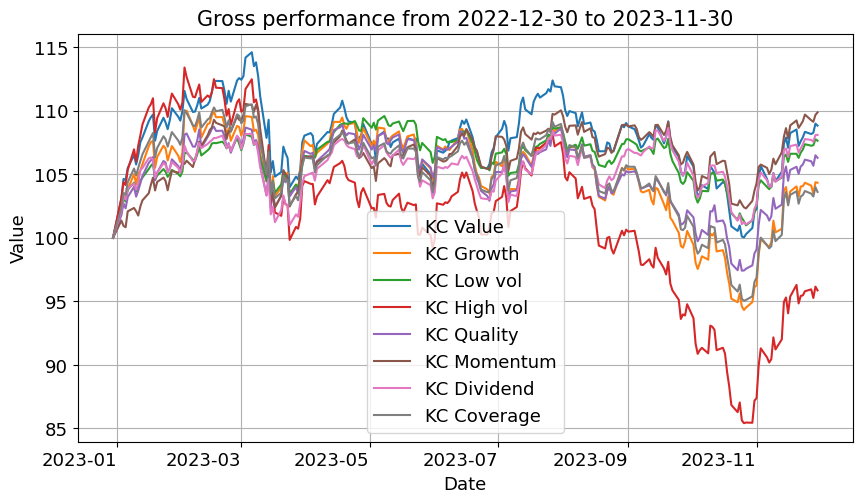

In [10]:
end_of_2022 = pd.Timestamp('2022-12-31')
# Ensure your DataFrame is sorted by the index
df_gr_level = df_index_level.sort_index()

# Find the closest available date at or before end_of_2022
closest_date = df_gr_level[df_gr_level.index <= end_of_2022].index.max()

# Filter to only include data up to the closest date
df_gr_level = df_gr_level[df_gr_level.index >= closest_date]

# Rename and select columns
df_gr_level = df_gr_level[idx_gr_id].rename(columns=s_index_id_name)
df_gr_level.columns = [col[:-3] for col in df_gr_level.columns if ' GR' in col]

# Rebase the index levels to 100 at the closest date
rebase_value = df_gr_level.loc[closest_date]
df_gr_level = df_gr_level / rebase_value * 100

title = "Gross performance from %s to %s" % (df_gr_level.index.min().strftime('%Y-%m-%d'), df_gr_level.index.max().strftime('%Y-%m-%d'))
df_gr_level.plot(figsize=(10,6), rot=0, fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.title(title, fontsize=15)
plt.legend(fontsize=13)
plt.grid()
plt.show()